In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import random

def generate_random_bits_and_bases(n):
    bits = np.random.randint(2, size=n)
    bases = np.random.randint(2, size=n)
    return bits, bases

def encode_qubits(bits, bases):
    qubits = []
    for bit, basis in zip(bits, bases):
        qc = QuantumCircuit(1, 1)
        if bit == 1:
            qc.x(0)
        if basis == 1:
            qc.h(0)
        qubits.append(qc)
    return qubits

def measure_qubits(qubits, bases, backend):
    measured_bits = []
    for qc, basis in zip(qubits, bases):
        if basis == 1:
            qc.h(0)
        qc.measure(0, 0)
        job = backend.run(qc, shots=1)
        result = job.result()
        counts = result.get_counts()
        measured_bit = int(list(counts.keys())[0])
        measured_bits.append(measured_bit)
    return measured_bits

def sift_key(alice_bits, alice_bases, bob_bits, bob_bases):
    key = []
    mismatches = 0
    for i in range(len(alice_bits)):
        if alice_bases[i] == bob_bases[i]:
            key.append(alice_bits[i])
        else:
            mismatches += 1  # Track mismatches
    return key, mismatches

def bb84_protocol(n, backend):
    alice_bits, alice_bases = generate_random_bits_and_bases(n)
    qubits = encode_qubits(alice_bits, alice_bases)
    _, bob_bases = generate_random_bits_and_bases(n)
    bob_bits = measure_qubits(qubits, bob_bases, backend)
    final_key, mismatches = sift_key(alice_bits, alice_bases, bob_bits, bob_bases)

    key_agreement_rate = (len(final_key) / n) * 100
    error_rate = (mismatches / n) * 100

    return n, len(final_key), key_agreement_rate, error_rate



In [2]:
backend = AerSimulator()
n_values = [10, 50, 100, 200, 500, 1000]  # Different numbers of qubits
final_key_lengths = []
key_agreement_rates = []
error_rates = []

for n in n_values:
    n_total, key_length, key_rate, error_rate = bb84_protocol(n, backend)
    final_key_lengths.append(key_length)
    key_agreement_rates.append(key_rate)
    error_rates.append(error_rate)



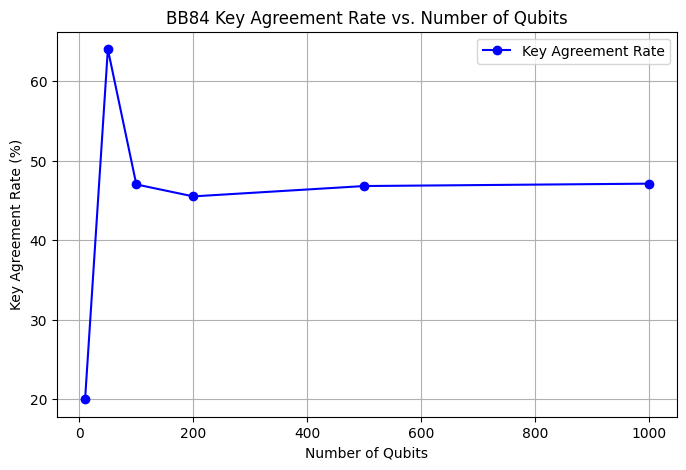

In [3]:
plt.figure(figsize=(8,5))
plt.plot(n_values, key_agreement_rates, marker='o', linestyle='-', color='b', label="Key Agreement Rate")
plt.xlabel("Number of Qubits")
plt.ylabel("Key Agreement Rate (%)")
plt.title("BB84 Key Agreement Rate vs. Number of Qubits")
plt.legend()
plt.grid()
plt.show()


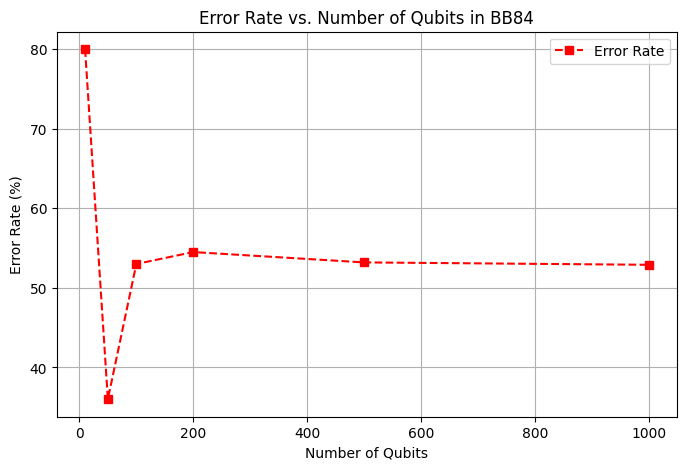

In [4]:
plt.figure(figsize=(8,5))
plt.plot(n_values, error_rates, marker='s', linestyle='--', color='r', label="Error Rate")
plt.xlabel("Number of Qubits")
plt.ylabel("Error Rate (%)")
plt.title("Error Rate vs. Number of Qubits in BB84")
plt.legend()
plt.grid()
plt.show()


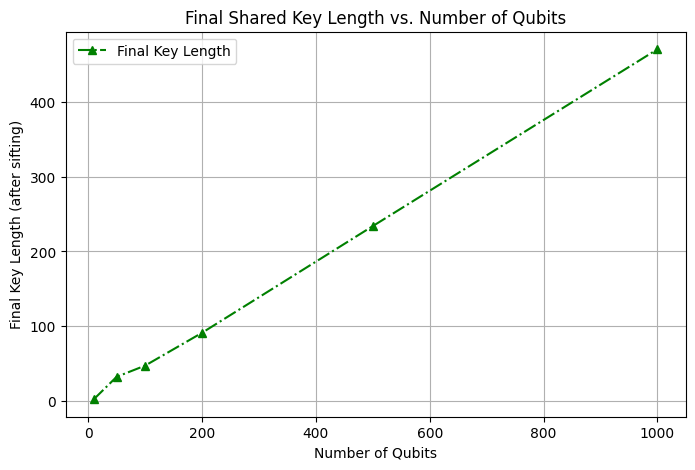

In [5]:
plt.figure(figsize=(8,5))
plt.plot(n_values, final_key_lengths, marker='^', linestyle='-.', color='g', label="Final Key Length")
plt.xlabel("Number of Qubits")
plt.ylabel("Final Key Length (after sifting)")
plt.title("Final Shared Key Length vs. Number of Qubits")
plt.legend()
plt.grid()
plt.show()
